## colab에서 실행

## 데이터 https://goo.gl/s8qSL5

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import make_scorer
%matplotlib inline

## colab에서 실행하는 경우 필요한 코드

In [7]:
# import os, os.path, shutil
# if not os.path.exists("./data"):
#     os.makedirs("./data")
#     https://www.dropbox.com/s/x7igxpgnq669l7y/bike_train.csv
!curl -L https://goo.gl/s8qSL5  -o ./data/bike_train.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0

  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100  643k  100  643k    0     0   289k      0  0:00:02  0:00:02 --:--:--  900k


In [10]:
train = pd.read_csv("data/bike_train.csv", parse_dates=["datetime"])
train.head().T

,0,1,2,3,4
datetime,2011-01-01 00:00:00,2011-01-01 01:00:00,2011-01-01 02:00:00,2011-01-01 03:00:00,2011-01-01 04:00:00
season,1,1,1,1,1
holiday,0,0,0,0,0
workingday,0,0,0,0,0
weather,1,1,1,1,1
temp,9.84,9.02,9.02,9.84,9.84
atemp,14.395,13.635,13.635,14.395,14.395
humidity,81,80,80,75,75
windspeed,0,0,0,0,0
casual,3,8,5,3,0


In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null datetime64[ns]
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [12]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


## datetime 데이터 분해

In [13]:
train["d-year"] = train["datetime"].dt.year
train["d-month"] = train["datetime"].dt.month
train["d-day"] = train["datetime"].dt.day
train["d-hour"] = train["datetime"].dt.hour
train["d-minute"] = train["datetime"].dt.minute
train["d-second"] = train["datetime"].dt.second

train[["datetime", "d-year", "d-month", "d-day", "d-hour", "d-minute", "d-second"]].head()

,datetime,d-year,d-month,d-day,d-hour,d-minute,d-second
0,2011-01-01 00:00:00,2011,1,1,0,0,0
1,2011-01-01 01:00:00,2011,1,1,1,0,0
2,2011-01-01 02:00:00,2011,1,1,2,0,0
3,2011-01-01 03:00:00,2011,1,1,3,0,0
4,2011-01-01 04:00:00,2011,1,1,4,0,0


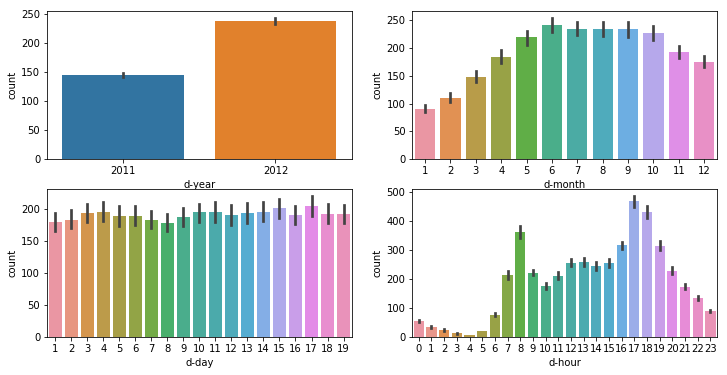

In [14]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(12, 6)

sns.barplot(data=train, x="d-year", y="count", ax=ax1)
sns.barplot(data=train, x="d-month", y="count", ax=ax2)
sns.barplot(data=train, x="d-day", y="count", ax=ax3)
sns.barplot(data=train, x="d-hour", y="count", ax=ax4)

## 시간대별 평균 대여수 (주중, 주말 구분)

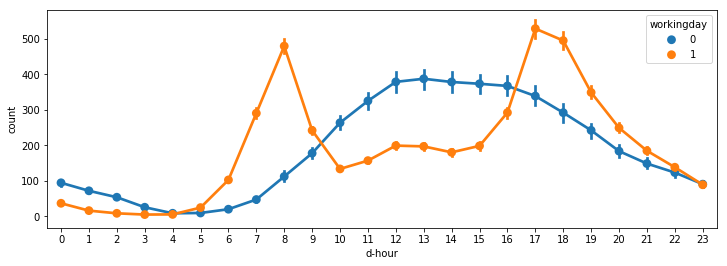

In [17]:
plt.figure(figsize=(12,4))
sns.pointplot(data=train, x="d-hour", y="count", hue="workingday")

## 시간대별 대여수 - 요일 구분

In [18]:
train["d-dayofweek"] = train["datetime"].dt.dayofweek

print(train.shape)
train[["datetime", "d-dayofweek"]].head()

(10886, 19)


,datetime,d-dayofweek
0,2011-01-01 00:00:00,5
1,2011-01-01 01:00:00,5
2,2011-01-01 02:00:00,5
3,2011-01-01 03:00:00,5
4,2011-01-01 04:00:00,5


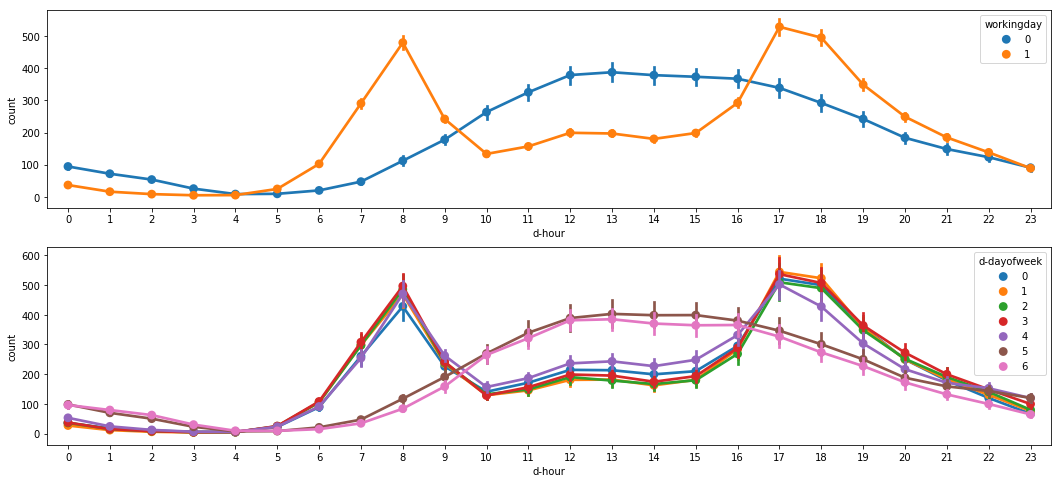

In [19]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 8)

sns.pointplot(data=train, x="d-hour", y="count", hue="workingday", ax=ax1)
sns.pointplot(data=train, x="d-hour", y="count", hue="d-dayofweek", ax=ax2)

## 연도와 월을 합한 특성 변수 생성

In [20]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train["d-year_month"] = train["datetime"].apply(concatenate_year_month)

print(train.shape)
train[["datetime", "d-year_month"]].head()

(10886, 20)


,datetime,d-year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


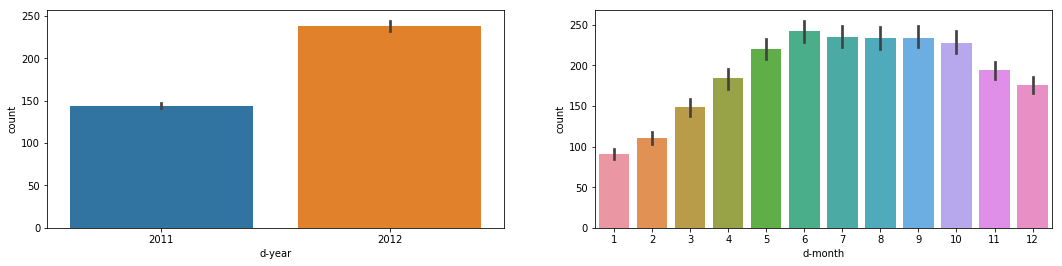

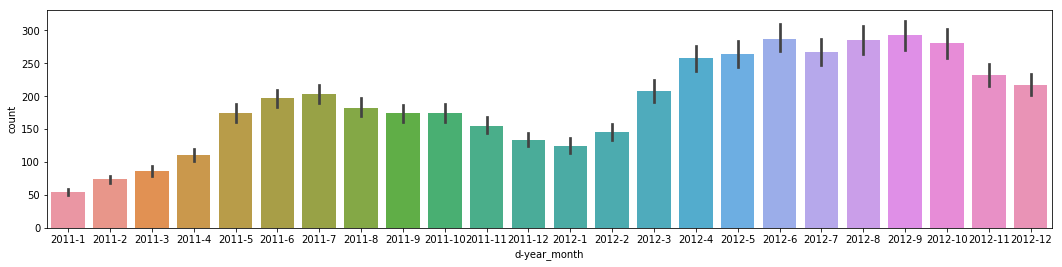

In [21]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="d-year", y="count", ax=ax1)
sns.barplot(data=train, x="d-month", y="count", ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 4)

sns.barplot(data=train, x="d-year_month", y="count", ax=ax3)

## 훈련에 사용할 특성 선택

In [22]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'd-year', 'd-month', 'd-day', 'd-hour', 'd-minute', 'd-second',
       'd-dayofweek', 'd-year_month'],
      dtype='object')

In [114]:
# features = ["season", "holiday", "workingday", "weather",            
#             "temp", "atemp", "humidity", "windspeed",
#                  "d-year", "d-hour", "d-dayofweek"]

features = ["season", "holiday", "workingday", "weather",            
            "temp", "atemp", "humidity", "windspeed", "windspeed", "casual", "registered",
                 "d-year", "d-hour", "d-dayofweek"]

In [115]:
X = train[features]
print(X.shape)
X.head()

(10886, 14)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,windspeed,casual,registered,d-year,d-hour,d-dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,0.0,3,13,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,0.0,8,32,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,0.0,5,27,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,0.0,3,10,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,0.0,0,1,2011,4,5


In [116]:
y = train["count"]
print(y.shape)

(10886,)


In [117]:
## log를 씌우는 이유는 평가 결과 값의 편차를 상대적으로 줄이기 위해서. MAE vs MSE vs MSLE
## 평가 결과값이 클때 오차를 줄일 필요가 있으면 MSE
## 평가 결과값이 작을때의 오차를 줄일 필요가 있으면 MSLE

import numpy as np
y_log = np.log(y + 1) #y가 0열 경우에 오류를 방지하기 위함

print(y_log.shape)
y_log.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

## 간단한 예측 모델

In [120]:
np.random.seed(101)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [121]:
X_train.shape, X_test.shape

((8708, 14), (2178, 14))

In [122]:
model = RandomForestRegressor(n_estimators= 100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

# R스퀘어 값

0.9996346939042524

In [38]:
list(zip(y_test, model.predict(X_test)))[:10]

[(6, 7.09),
 (42, 47.03),
 (610, 515.91),
 (16, 17.81),
 (70, 88.12),
 (14, 24.26),
 (415, 369.47),
 (232, 231.93),
 (237, 346.1),
 (290, 275.65)]

In [49]:
1-((y_test - model.predict(X_test))**2).mean()/((y_test - y_test.mean())**2).mean()

0.9506671938417536

In [34]:
X_train[:5]

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,d-year,d-hour,d-dayofweek
7560,2,0,1,3,22.14,25.760,88,19.0012,2012,9,0
8090,2,0,0,1,25.42,31.060,57,7.0015,2012,11,6
30,1,0,0,2,16.40,20.455,76,12.9980,2011,7,6
7290,2,0,1,2,18.86,22.725,88,0.0000,2012,3,3
8665,3,0,1,2,32.80,37.120,52,12.9980,2012,10,4


## Feature 선택

In [56]:
# features_selected = ["season", "holiday", "workingday", "weather",
#                      "temp", "atemp", "humidity", "windspeed",
#                      "d-year", "d-hour", "d-dayofweek"]

features_selected = ["season", "holiday", "weather"]

In [57]:
X1 = train[features_selected]

In [58]:
np.random.seed(1111)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size = 0.2)

In [78]:
model = RandomForestRegressor(n_estimators= 100)
model.fit(X_train1, y_train1)
model.score(X_test1, y_test1)

0.08328239869531529

## 선형회귀

In [50]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.37561934247883966

In [51]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.8982448736705144

## 성능 지표( score) 함수 변경

In [92]:
def rmsle(predict, actual):
    predict = np.array(predict)
    actual = np.array(actual)
    
    log_predict = predict + 1
    log_actual = actual + 1
    
    difference = log_predict - log_actual
    difference = np.square(difference)
    
    mean_difference = difference.mean()    
    score = np.sqrt(mean_difference)
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

## 하이퍼파라미터 선택

### 그리드 탐색

In [93]:
n_estimators = 30

max_depth_list = [10, 20, 30]
max_features_list = [0.3, 0.5, 0.9]

hyperparameters_list = []

for max_depth in max_depth_list:
    for max_features in max_features_list:
        model = RandomForestRegressor(n_estimators=n_estimators,
                                      max_depth=max_depth,
                                      max_features=max_features,
                                      random_state=11,
                                      n_jobs=-1)

        score = cross_val_score(model, X_train, y_train, cv=5,
                                scoring=rmsle_scorer).mean()

        hyperparameters_list.append({
            'score': score,
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features': max_features,
        })

        print("Score = {0:.5f}".format(score))

hyperparameters_list

Score = 82.46058
Score = 65.18965
Score = 50.68509
Score = 63.61854
Score = 49.85210
Score = 43.68359
Score = 64.40226
Score = 49.84540
Score = 43.98982


[{'score': 82.46058095287601,
  'n_estimators': 30,
  'max_depth': 10,
  'max_features': 0.3},
 {'score': 65.18965382821918,
  'n_estimators': 30,
  'max_depth': 10,
  'max_features': 0.5},
 {'score': 50.68508595894201,
  'n_estimators': 30,
  'max_depth': 10,
  'max_features': 0.9},
 {'score': 63.61854488242934,
  'n_estimators': 30,
  'max_depth': 20,
  'max_features': 0.3},
 {'score': 49.85209899588742,
  'n_estimators': 30,
  'max_depth': 20,
  'max_features': 0.5},
 {'score': 43.68359015460392,
  'n_estimators': 30,
  'max_depth': 20,
  'max_features': 0.9},
 {'score': 64.40225777149196,
  'n_estimators': 30,
  'max_depth': 30,
  'max_features': 0.3},
 {'score': 49.845398382105095,
  'n_estimators': 30,
  'max_depth': 30,
  'max_features': 0.5},
 {'score': 43.989822316700966,
  'n_estimators': 30,
  'max_depth': 30,
  'max_features': 0.9}]

In [94]:
hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

(9, 4)


,max_depth,max_features,n_estimators,score
5,20,0.9,30,43.683590
8,30,0.9,30,43.989822
7,30,0.5,30,49.845398
4,20,0.5,30,49.852099
2,10,0.9,30,50.685086


### 랜덤 탐색

In [95]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

hyperparameters_list = []

n_estimators = 30
num_epoch = 10

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=2, high=100)
    max_features = np.random.uniform(low=0.1, high=1.0)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  random_state=37,
                                  n_jobs=-1)

    score = cross_val_score(model, X_train, y_train, cv=5,
                            scoring=rmsle_scorer).mean()

    hyperparameters_list.append({
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    })

    print("Score = {0:.5f}".format(score))

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

Score = 49.58649
Score = 46.89069
Score = 56.33613
Score = 46.89069
Score = 43.73641
Score = 43.99683
Score = 49.58649
Score = 46.89069
Score = 46.89069
Score = 81.28034
(10, 4)


,max_depth,max_features,n_estimators,score
4,91,0.904707,30,43.736409
5,79,0.981396,30,43.996830
1,57,0.550295,30,46.890688
3,64,0.564408,30,46.890688
7,62,0.579520,30,46.890688


### 상세 탐색

In [54]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

hyperparameters_list = []

n_estimators = 10
num_epoch = 10

for epoch in range(num_epoch):
    max_depth = np.random.randint(low=10, high=70)
    max_features = np.random.uniform(low=0.4, high=1.0)

    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  random_state=37,
                                  n_jobs=-1)

    score = cross_val_score(model, X_train, y_train, cv=5,
                            scoring=rmsle_scorer).mean()

    hyperparameters_list.append({
        'score': score,
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'max_features': max_features,
    })

    print("Score = {0:.5f}".format(score))

hyperparameters_list = pd.DataFrame.from_dict(hyperparameters_list)
hyperparameters_list = hyperparameters_list.sort_values(by="score")

print(hyperparameters_list.shape)
hyperparameters_list.head()

Score = 0.36444
Score = 0.33882
Score = 0.34933
Score = 0.35628
Score = 0.35040
Score = 0.34485
Score = 0.36444
Score = 0.33882
Score = 0.35628
Score = 0.35040
(10, 4)


,max_depth,max_features,n_estimators,score
1,34,0.939039,10,0.338818
7,63,0.916317,10,0.338818
5,19,0.796031,10,0.344853
2,28,0.718385,10,0.349331
4,44,0.673892,10,0.350404


## 최종 모델 선택

In [96]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=300,
                              max_depth=83,
                              max_features=0.851358,
                              random_state=37,
                              n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=83,
           max_features=0.851358, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=-1,
           oob_score=False, random_state=37, verbose=0, warm_start=False)

## Score (rmsle)

$$ \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 } $$

In [97]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_train, y_train, cv=5,
                        scoring=rmsle_scorer).mean()

print("Score = {0:.5f}".format(score))

Score = 42.91855


## 주요 특성 변수

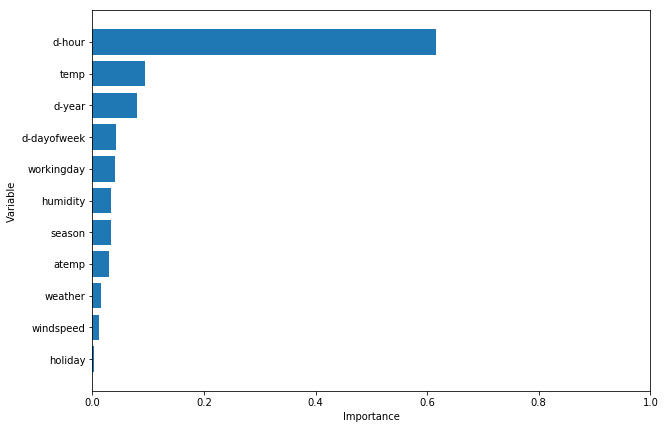

In [91]:
df = pd.DataFrame({'feature':features,'importance':model.feature_importances_ })
df=df.sort_values('importance', ascending=True)
x = df.feature
y = df.importance
ypos = np.arange(len(x))

plt.figure(figsize=(10,7))
plt.barh(x, y)
plt.yticks(ypos, x)
plt.xlabel('Importance')
plt.ylabel('Variable')
plt.xlim(0, 1)
plt.ylim(-1, len(x))
plt.show()